# Variables

Reference: <br>
    University of College London Python lecture note <br>
    MIT Python lecture note <br>
    Scipy lecture notes (http://scipy-lectures.org/index.html)

## Variables

- Variables are how values are stored in a computer. They form the basis of all imperative programming languages.
- A variable can be a number, a character, a string (sequence of character), a collection of numbers, etc. 
- The equal sign (=) is used to assign a value to a variable (again, be careful to not confuse with testing for equality ==).

### Examples of variables

In [65]:
width = 20

### Exercise

Define a variable with a name pi with a value of 3.14.

Variables are manipulated and combined with operators, forming “expressions”.

In [66]:
height = 20
width =5
height * width

100

More complex operations are provided by functions. For example, the absolute value of a number:

In [67]:
abs(-3)

3

Variables must be “defined” (assigned a value) before they can be used, or an error will occur:

In [68]:
n

NameError: name 'n' is not defined

Variables in Python are “typed”. 

In [69]:
a = 10
b = 20.0
c = "it's just a flesh wound!"

Every variable has a given type, which you can check by writing type(varname).

In [70]:
type(a)

int

### Exercise: 
What is the types of variables b?

### Exercise: 
What is the types of variables c?

Directly combining variables of different types usually creates an error (although Python automatically converts some of them, e.g. int to float).
(Python is dynamically strongly typed).

## Strings
- A string is a sequence of characters.<br>
- Strings must be enclosed in quotes (''). Double quotes ("") also work

In [1]:
text = 'This is a string'

Strings have a length: their number of characters (includes everything!) <br>
    Use the len function to get it.

In [3]:
len(text)

16

# Python program
- Example

In [6]:
# Definitions (This is a comment)
width = 10
height = 20
length = 30

# Do the math and show the results
volume = width*height*length
print ('Volume: ', volume)

Volume:  6000


### Exercise: 
Write a program that calculates the area of a circle (use the above example).

### Advanced (optional)
Plot temperature data from NCEP reanalysis data.
xarray.open_dataset can open and decode a dataset from a file path or an OpenDAP URL.

The dataset that we will be using is here:
https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep.reanalysis/surface/catalog.html

In [2]:
import xarray as xr
file = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2021.nc'
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 96)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-01-24T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2014)
    history:                         created 2017/12 by Hoop (netCDF2.3)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

Plot temperature for the last time step.

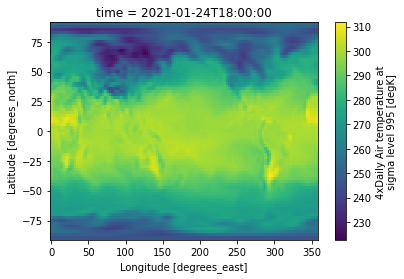

In [3]:
ds.air.isel(time=-1).plot()

/Users/jungeunl/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


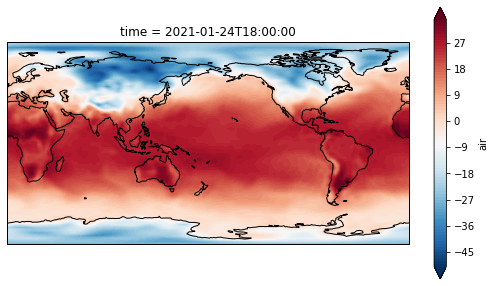

In [8]:
# Make a prettier plot
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
lev1=np.arange(-50,36,1)
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
(ds.air.isel(time=-1)-273).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1)
ax.coastlines()

In [9]:
ds.time.isel(time=0)

<xarray.DataArray 'time' ()>
array('2021-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2021-01-01
Attributes:
    long_name:      Time
    delta_t:        0000-00-00 06:00:00
    standard_name:  time
    axis:           T
    actual_range:   [1937256. 1937826.]
    _ChunkSizes:    512

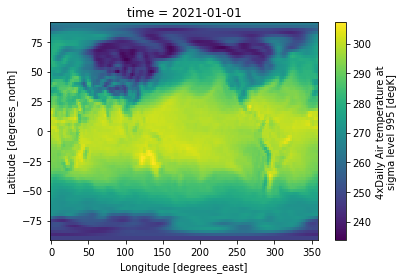

In [10]:
# Plot global T for January 1st 00 UTC
ds.air.sel(time='2021-01-01T00:00:00.000000000').plot()

### Optional Exercise
Plot temperature for January 6th 12 UTC.

In [5]:
print(ds.lat)
print(ds.lon)

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y
<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.

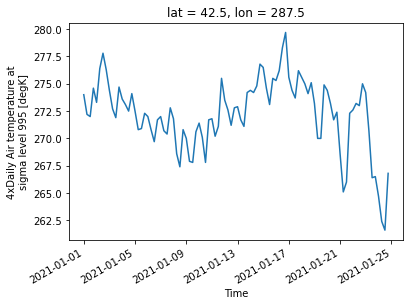

In [7]:
#Plot temperature of a point in January
lat_pvd=41.8
lon_pvd=-71.4+360
ds.air.sel(lat=lat_pvd,lon=lon_pvd , method='nearest').plot()